# Between Concrete & Countryside - The Urban-Rural Divide in Environmental Views

## General Information

This project examines urban-rural differences in environmental attitudes and behaviours across Europe.

**Authors:** Alex Duni, Azizbek Ussenov, Anna Heckhausen

**Date:** 15 December 2024

**Data:**
In this project, we use data from the ESS and from the WorldBank. You can access this data under the following links.

[ESS data (Round 8)](https://ess.sikt.no/en/datafile/ffc43f48-e15a-4a1c-8813-47eda377c355/93?tab=0)

[WorldBank data](https://ess.sikt.no/en/datafile/ffc43f48-e15a-4a1c-8813-47eda377c355/93?tab=0): 2016, Indicator: Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative); selected countries from ESS without Israel and Russia



## Explanations (internal use - remove before submission):

**comments that start with 'To-Do'** are things to do. Such comments should be removed before we submit anything.

**comments that start with 'Question'** are questions we need to solve. Such comments should be removed before we submit anything.

comments that do not start with 'To-do' or 'Question' are explanations of the code below (which

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

In [2]:
survey_df = pd.read_csv('/workspaces/ESG-Analysis/Data/ESS8e02_3.csv')
survey_df.head()

/tmp/ipykernel_57466/2187113890.py:1: DtypeWarning: Columns (168) have mixed types. Specify dtype option on import or set low_memory=False.
  survey_df = pd.read_csv('/workspaces/ESG-Analysis/Data/ESS8e02_3.csv')


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
0,ESS8e02_3,8,2.3,23.11.2023,1,AT,0.611677,1.178495,0.370393,0.436506,...,12,2016,7,37,5,12,2016,8,33,50.0
1,ESS8e02_3,8,2.3,23.11.2023,2,AT,1.223354,0.899471,0.370393,0.333158,...,11,2016,9,39,25,11,2016,11,10,86.0
2,ESS8e02_3,8,2.3,23.11.2023,4,AT,0.389058,0.315753,0.370393,0.116953,...,11,2016,17,17,22,11,2016,18,0,38.0
3,ESS8e02_3,8,2.3,23.11.2023,6,AT,0.642594,0.472467,0.370393,0.174999,...,10,2016,19,9,11,10,2016,19,59,46.0
4,ESS8e02_3,8,2.3,23.11.2023,10,AT,3.432402,2.246706,0.370393,0.832164,...,12,2016,10,31,1,12,2016,11,49,70.0


In [3]:
survey_df.describe()

,essround,edition,idno,dweight,pspwght,pweight,anweight,nwspol,netusoft,netustm,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
count,44387.0,4.438700e+04,4.438700e+04,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,...,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,44387.000000,43250.000000
mean,8.0,2.300000e+00,3.154578e+07,1.000000,1.000000,1.174817,1.174817,189.470701,3.862077,2299.033343,...,8.177214,2020.365512,14.334310,25.562890,15.853741,8.152883,2018.027553,16.113412,29.491675,65.225272
std,0.0,4.440942e-16,1.155417e+08,0.390219,0.548561,1.301596,1.923216,962.889443,1.594919,3063.010782,...,4.329691,177.674958,3.947528,18.514428,8.731993,4.041277,113.658562,8.608613,18.768750,26.680245
min,8.0,2.300000e+00,1.000000e+00,0.036070,0.018145,0.030226,0.007141,0.000000,1.000000,0.000000,...,1.000000,2016.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,0.000000
25%,8.0,2.300000e+00,1.208000e+03,0.915591,0.694870,0.239750,0.187990,30.000000,3.000000,120.000000,...,5.000000,2016.000000,12.000000,9.000000,8.000000,5.000000,2016.000000,13.000000,14.000000,50.000000
50%,8.0,2.300000e+00,2.589000e+03,1.000000,0.920021,0.520820,0.475879,60.000000,5.000000,240.000000,...,10.000000,2016.000000,14.000000,24.000000,16.000000,10.000000,2016.000000,16.000000,29.000000,60.000000
75%,8.0,2.300000e+00,1.105750e+04,1.044025,1.169933,2.013008,1.739004,90.000000,5.000000,6666.000000,...,11.000000,2017.000000,17.000000,41.000000,23.000000,11.000000,2017.000000,18.000000,45.000000,75.000000
max,8.0,2.300000e+00,5.516031e+08,6.206992,4.002002,4.985758,19.945196,9999.000000,9.000000,9999.000000,...,99.000000,9999.000000,99.000000,99.000000,99.000000,99.000000,9999.000000,99.000000,99.000000,1083.000000


In [4]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44387 entries, 0 to 44386
Columns: 535 entries, name to inwtm
dtypes: float64(227), int64(298), object(10)
memory usage: 181.2+ MB


Selecting only columns according to the research interest

In [5]:
data_needed = survey_df[['idno', 'cntry', 'domicil', 'wrclmch', 'clmthgt2', 'ccgdbd', 'eneffap', 'rdcenr', 'ccrdprs', 'eisced', 'lrscale']]
data_needed.head()

,idno,cntry,domicil,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale
0,1,AT,1,4,4,10,8,4,8,7,0
1,2,AT,1,4,4,2,10,5,7,4,1
2,4,AT,4,4,4,2,9,4,8,3,5
3,6,AT,1,3,3,7,10,4,6,3,0
4,10,AT,3,4,2,5,10,6,6,3,5


In [6]:
data_needed[data_needed['cntry'] == 'AT']

,idno,cntry,domicil,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale
0,1,AT,1,4,4,10,8,4,8,7,0
1,2,AT,1,4,4,2,10,5,7,4,1
2,4,AT,4,4,4,2,9,4,8,3,5
3,6,AT,1,3,3,7,10,4,6,3,0
4,10,AT,3,4,2,5,10,6,6,3,5
...,...,...,...,...,...,...,...,...,...,...,...
2005,3957,AT,4,2,3,0,8,5,10,3,5
2006,3959,AT,4,4,3,2,9,4,7,3,4
2007,3961,AT,4,3,3,3,10,3,8,5,6
2008,3962,AT,4,4,4,2,9,5,3,2,6


In [7]:
data_needed.isna().sum()

idno        0
cntry       0
domicil     0
wrclmch     0
clmthgt2    0
ccgdbd      0
eneffap     0
rdcenr      0
ccrdprs     0
eisced      0
lrscale     0
dtype: int64

In [8]:
data_needed['cntry'].unique()

array(['AT', 'BE', 'CH', 'CZ', 'DE', 'EE', 'ES', 'FI', 'FR', 'GB', 'HU',
       'IE', 'IL', 'IS', 'IT', 'LT', 'NL', 'NO', 'PL', 'PT', 'RU', 'SE',
       'SI'], dtype=object)

Remove countries that are not part of Europe (Russian Federation, Israel) and Ensure no 'RU' or 'IS'

In [9]:
data_needed = data_needed[~data_needed['cntry'].isin(['RU', 'IL'])]

if data_needed['cntry'].isin(['RU', 'IL']).any():
    print("Still: 'RU' or 'IL'")
else:
    print("No: 'RU' or 'IL'")

No: 'RU' or 'IL'


##### Recoding `domicil` into two category 'City' and 'Rural'

In [10]:
def classify_area(value):
    if value in [1, 2, 3]:
        return 'City'
    elif value in [4, 5]:
        return 'Rural'
    else:
        return None

data_needed['area_type'] = data_needed['domicil'].apply(classify_area)

In [11]:
data_needed.drop(columns=['domicil'])

,idno,cntry,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type
0,1,AT,4,4,10,8,4,8,7,0,City
1,2,AT,4,4,2,10,5,7,4,1,City
2,4,AT,4,4,2,9,4,8,3,5,Rural
3,6,AT,3,3,7,10,4,6,3,0,City
4,10,AT,4,2,5,10,6,6,3,5,City
...,...,...,...,...,...,...,...,...,...,...,...
44382,1303,SI,3,3,5,10,5,5,4,1,Rural
44383,1304,SI,3,3,5,5,3,4,6,5,City
44384,1305,SI,4,4,1,10,6,7,6,0,City
44385,1306,SI,3,4,4,8,4,7,7,4,City


Data from World Bank about education

In [12]:
world_bank_df = pd.read_csv('/workspaces/ESG-Analysis/Data/01d4cc76-d950-4515-a40d-b85330acb7b9_Data.csv')
world_bank_df

,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Austria,AUT,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,98.968643
1,Belgium,BEL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,84.790001
2,Czechia,CZE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.800003
3,Estonia,EST,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.114182
4,Finland,FIN,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,85.521523
5,France,FRA,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,83.690002
6,Germany,DEU,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,96.510002
7,Hungary,HUN,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,97.180000
8,Iceland,ISL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.538902
9,Ireland,IRL,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,86.810600


In [13]:
# Setting '2021 [YR2021]' as a variable to call it more efficiently
year = '2016 [YR2016]'

In [14]:
set(world_bank_df[year])

{nan,
 nan,
 54.189998626709,
 nan,
 75.8000030517578,
 nan,
 nan,
 80.1383743286133,
 83.6900024414062,
 84.7900009155273,
 85.3300018310547,
 85.5215225219727,
 86.8106002807617,
 89.7099990844727,
 90.5400009155273,
 95.1800003051758,
 96.5100021362305,
 96.8899993896484,
 97.1800003051758,
 97.620002746582,
 97.7616348266602,
 98.9686431884766,
 99.1141815185547,
 99.2300033569336,
 99.5389022827148,
 99.8000030517578}

In [15]:
world_bank_df.replace('..', np.nan, inplace=True) # replace '..' for nan values
world_bank_df = world_bank_df[~world_bank_df[year].isna()] # remove all nan values

In [16]:
world_bank_df['Country Code'].unique()

array(['AUT', 'BEL', 'CZE', 'EST', 'FIN', 'FRA', 'DEU', 'HUN', 'ISL',
       'IRL', 'ITA', 'LTU', 'NLD', 'NOR', 'POL', 'PRT', 'SVN', 'ESP',
       'SWE', 'CHE', 'GBR'], dtype=object)

In [17]:
three_to_two = {
    'AUT': 'AT', 
    'BEL': 'BE', 
    'CZE': 'CZ', 
    'EST': 'EE', 
    'FIN': 'FI',
    'FRA': 'FR', 
    'DEU': 'DE', 
    'HUN': 'HU', 
    'ISL': 'IS', 
    'IRL': 'IE',
    'ITA': 'IT', 
    'LTU': 'LT', 
    'NLD': 'NL', 
    'NOR': 'NO', 
    'POL': 'PL',
    'PRT': 'PT', 
    'SVN': 'SI', 
    'ESP': 'ES', 
    'SWE': 'SE', 
    'CHE': 'CH',
    'GBR': 'GB'
}

world_bank_df['Country Code'] = world_bank_df['Country Code'].map(three_to_two)
world_bank_df


/tmp/ipykernel_57466/3257060602.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_bank_df['Country Code'] = world_bank_df['Country Code'].map(three_to_two)


,Country Name,Country Code,Series Name,Series Code,2016 [YR2016]
0,Austria,AT,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,98.968643
1,Belgium,BE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,84.790001
2,Czechia,CZ,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.800003
3,Estonia,EE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.114182
4,Finland,FI,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,85.521523
5,France,FR,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,83.690002
6,Germany,DE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,96.510002
7,Hungary,HU,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,97.180000
8,Iceland,IS,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,99.538902
9,Ireland,IE,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.ZS,86.810600


Pivot the dataframe to have a proper dataframe

In [18]:
world_bank_df = world_bank_df.pivot(columns='Series Name', index='Country Code', values=year).reset_index()
world_bank_df.columns.name = None
world_bank_df

,Country Code,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,AT,98.968643
1,BE,84.790001
2,CH,96.889999
3,CZ,99.800003
4,DE,96.510002
5,EE,99.114182
6,ES,75.800003
7,FI,85.521523
8,FR,83.690002
9,GB,97.761635


Merging of Survey and World Bank data

In [19]:
data_needed.shape

(39400, 12)

### Environmental attitudes Proprocessing: wrclmch, clmthgt1, ccgdbd

##### Removing NA values

<table>
  <tr>
    <td>
      <b>Table 1: wrclmch</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Not at all worried</td></tr>
        <tr><td>2</td><td>Not very worried</td></tr>
        <tr><td>3</td><td>Somewhat worried</td></tr>
        <tr><td>4</td><td>Very worried</td></tr>
        <tr><td>5</td><td>Extremely worried</td></tr>
        <tr><td>6</td><td>Not applicable*</td></tr>
        <tr><td>7</td><td>Refusal*</td></tr>
        <tr><td>8</td><td>Don't know*</td></tr>
        <tr><td>9</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
    <td>
      <b>Table 2: clmthgt2</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Not at all</td></tr>
        <tr><td>2</td><td>Very little</td></tr>
        <tr><td>3</td><td>Some</td></tr>
        <tr><td>4</td><td>A lot</td></tr>
        <tr><td>5</td><td>A great deal</td></tr>
        <tr><td>6</td><td>Not applicable*</td></tr>
        <tr><td>7</td><td>Refusal*</td></tr>
        <tr><td>8</td><td>Don't know*</td></tr>
        <tr><td>9</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
    <td>
      <b>Table 3: ccgdbd</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Extremely bad</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>Extremely good</td></tr>
        <tr><td>66</td><td>Not applicable*</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
      <br>(*) Missing Value
    </td>
  </tr>
</table>


In [20]:
data_needed = data_needed[~data_needed['wrclmch'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['clmthgt2'].isin([6, 7, 8, 9])]
data_needed = data_needed[~data_needed['ccgdbd'].isin([66,77, 88, 99])]

In [21]:
data_needed.shape

(37171, 12)

### Environmental behaviours Proprocessing: wrclmch, clmthgt1, ccgdbd

##### Removing NA values

<table>
  <tr>
    <td>
      <b>Table 1: eneffap</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Not at all likely</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>Extremely likely</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
    <td>
      <b>Table 2: rdcenr</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>1</td><td>Never</td></tr>
        <tr><td>2</td><td>Hardly ever</td></tr>
        <tr><td>3</td><td>Sometimes</td></tr>
        <tr><td>4</td><td>Often</td></tr>
        <tr><td>5</td><td>Very often</td></tr>
        <tr><td>6</td><td>Always</td></tr>
        <tr><td>55</td><td>Cannot reduce energy use</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
    <td>
      <b>Table 3: ccrdprs</b><br>
      <table>
        <tr><th>Value</th><th>Category</th></tr>
        <tr><td>0</td><td>Not at all</td></tr>
        <tr><td>1</td><td>1</td></tr>
        <tr><td>2</td><td>2</td></tr>
        <tr><td>3</td><td>3</td></tr>
        <tr><td>4</td><td>4</td></tr>
        <tr><td>5</td><td>5</td></tr>
        <tr><td>6</td><td>6</td></tr>
        <tr><td>7</td><td>7</td></tr>
        <tr><td>8</td><td>8</td></tr>
        <tr><td>9</td><td>9</td></tr>
        <tr><td>10</td><td>A great deal</td></tr>
        <tr><td>66</td><td>Not applicable*</td></tr>
        <tr><td>77</td><td>Refusal*</td></tr>
        <tr><td>88</td><td>Don't know*</td></tr>
        <tr><td>99</td><td>No answer*</td></tr>
      </table>
    </td>
  </tr>
</table>


In [22]:
data_needed = data_needed[~data_needed['eneffap'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['rdcenr'].isin([77, 88, 99])]
data_needed = data_needed[~data_needed['ccrdprs'].isin([66, 77, 88, 99])]

In [23]:
data_needed.shape

(36212, 12)

##### Recoding `ccgdbd` to a scale of 1-5

In [24]:
def recode_ccgdbd(value):
    if value <= 2:       
        return 1
    elif value <= 4:     
        return 2
    elif value <= 6:     
        return 3
    elif value <= 8:     
        return 4
    elif value <= 10:    
        return 5
    else:
        return None 

data_needed['ccgdbd_recode'] = data_needed['ccgdbd'].apply(recode_ccgdbd)

##### Recoding 55 to 1 to have a common scale

In [25]:
def recode_rdcenr(value):
    if value == 55:
        return 1
    else:
        return value

data_needed['rdcenr_recode'] = data_needed['rdcenr'].apply(recode_rdcenr)

##### Recoding `eneffap` and `ccrdprs` to a scale of 1-6

In [26]:
def recode_to_rdcenr_scale(value):
    if value <= 1:
        return 1
    elif value <= 3:
        return 2
    elif value <= 5:
        return 3
    elif value <= 7:
        return 4
    elif value <= 9:
        return 5
    elif value == 10:
        return 6
    else:
        return None

data_needed['eneffap_recode'] = data_needed['eneffap'].apply(recode_to_rdcenr_scale)
data_needed['ccrdprs_recode'] = data_needed['ccrdprs'].apply(recode_to_rdcenr_scale)

In [27]:
data_needed

,idno,cntry,domicil,wrclmch,clmthgt2,ccgdbd,eneffap,rdcenr,ccrdprs,eisced,lrscale,area_type,ccgdbd_recode,rdcenr_recode,eneffap_recode,ccrdprs_recode
0,1,AT,1,4,4,10,8,4,8,7,0,City,5,4,5,5
1,2,AT,1,4,4,2,10,5,7,4,1,City,1,5,6,4
2,4,AT,4,4,4,2,9,4,8,3,5,Rural,1,4,5,5
3,6,AT,1,3,3,7,10,4,6,3,0,City,4,4,6,4
4,10,AT,3,4,2,5,10,6,6,3,5,City,3,6,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1303,SI,4,3,3,5,10,5,5,4,1,Rural,3,5,6,3
44383,1304,SI,3,3,3,5,5,3,4,6,5,City,3,3,3,3
44384,1305,SI,3,4,4,1,10,6,7,6,0,City,1,6,6,4
44385,1306,SI,3,3,4,4,8,4,7,7,4,City,2,4,5,4


In [28]:
data_needed = data_needed.drop(columns=['ccgdbd', 'rdcenr', 'eneffap', 'ccrdprs'])

In [29]:
data_needed

,idno,cntry,domicil,wrclmch,clmthgt2,eisced,lrscale,area_type,ccgdbd_recode,rdcenr_recode,eneffap_recode,ccrdprs_recode
0,1,AT,1,4,4,7,0,City,5,4,5,5
1,2,AT,1,4,4,4,1,City,1,5,6,4
2,4,AT,4,4,4,3,5,Rural,1,4,5,5
3,6,AT,1,3,3,3,0,City,4,4,6,4
4,10,AT,3,4,2,3,5,City,3,6,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
44382,1303,SI,4,3,3,4,1,Rural,3,5,6,3
44383,1304,SI,3,3,3,6,5,City,3,3,3,3
44384,1305,SI,3,4,4,6,0,City,1,6,6,4
44385,1306,SI,3,3,4,7,4,City,2,4,5,4


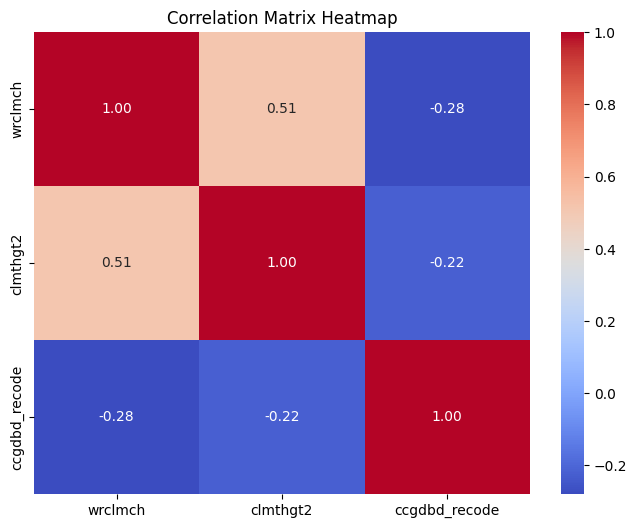

In [30]:
environmental_attitudes = data_needed[['wrclmch', 'clmthgt2', 'ccgdbd_recode']]
correlation_matrix = environmental_attitudes.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

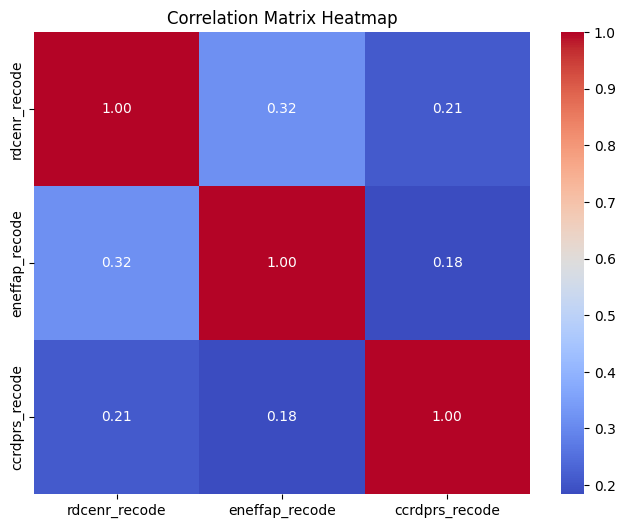

In [31]:
environmental_behaviours = data_needed[['rdcenr_recode', 'eneffap_recode', 'ccrdprs_recode']]
correlation_matrix = environmental_behaviours.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Merge the two DataFrames: Survey and World Bank


In [33]:
survey_and_wb = data_needed.merge(world_bank_df, left_on='cntry', right_on='Country Code', how='left')

# Drop the redundant "Country Code" column
survey_and_wb.drop(columns=['Country Code'], inplace=True)

survey_and_wb.head()

,idno,cntry,domicil,wrclmch,clmthgt2,eisced,lrscale,area_type,ccgdbd_recode,rdcenr_recode,eneffap_recode,ccrdprs_recode,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)"
0,1,AT,1,4,4,7,0,City,5,4,5,5,98.968643
1,2,AT,1,4,4,4,1,City,1,5,6,4,98.968643
2,4,AT,4,4,4,3,5,Rural,1,4,5,5,98.968643
3,6,AT,1,3,3,3,0,City,4,4,6,4,98.968643
4,10,AT,3,4,2,3,5,City,3,6,6,4,98.968643
